In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import keras.utils as image

path = "/content/drive/MyDrive/3D Conformer/Multi-Label Representation of Adverse Covid Drug Reactions.csv"
import csv
import pandas as pd
df = pd.read_csv(path)
df

,PubChem_ID,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,121304016,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
1,5743,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,0
2,3652,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,131411,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,6167,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,64927,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,44205240,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
7,132274054,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,1,0,0,1,0
8,134223875,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
9,135626798,0,0,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,1,1,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
df['PubChem_ID'] = df['PubChem_ID'].apply(str)
df_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/drive/MyDrive/3D Conformer/Conformer/'+df['PubChem_ID'][i]+'.png',target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    df_image.append(img)
X = np.array(df_image)

100%|██████████| 17/17 [00:00<00:00, 92.49it/s]


In [ ]:
y = np.array(df.drop(['PubChem_ID'],axis=1))
y.shape

(17, 29)

In [ ]:
X.shape

(17, 128, 128, 3)

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,MobileNet
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import (
    precision_score, recall_score, f1_score, cohen_kappa_score,
    roc_auc_score, confusion_matrix, hamming_loss
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Bidirectional, LSTM, Reshape, Dropout

def main_accuracy_score(y_test, y_pred):
    y_test = y_test.to_numpy()
    assert y_test.shape == y_pred.shape
    scores = [(np.sum(y_test[i] == y_pred[i]) / y_pred.shape[1]) for i in range(len(y_test))]
    return round(np.mean(scores), 4)

def create_cnn_blstm_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Reduced filters
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0),  # Increased dropout rate
        Flatten(),
        Reshape((1, -1)),
        Bidirectional(LSTM(64)),  # Reduced units in LSTM
        Dense(num_classes, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

loo = LeaveOneOut()
num_classes = 29
model = create_cnn_blstm_model(num_classes)

y_predictedvalues, y_predictedvalues1, y_testedvalues = [], [], []
i = 1

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Introduce noise to the training data
    noise_factor = 0.05
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)

    print(f"Training on Fold: {i}")
    i += 1

    model.fit(X_train_noisy, y_train, epochs=10, batch_size=32, verbose=1)  # Reduced epochs

    y_pred = model.predict(X_test)
    y_pred1 = (y_pred > 0.5).astype(int)

    y_predictedvalues.append(y_pred)
    y_predictedvalues1.append(y_pred1)
    y_testedvalues.append(y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training on Fold: 1
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.0000e+00 - loss: 0.6928
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.1250 - loss: 0.5411
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 0.4292
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1250 - loss: 0.3737
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0625 - loss: 0.3475
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0625 - loss: 0.3325
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0625 - loss: 0.3143
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1250 - loss: 0.3002
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 0.2894
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1250 - loss: 0.2816
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step
Training on Fold: 2
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 0.3143
Epoch 2/10
1/1 ━━━━━━━━

In [ ]:
y_test = np.reshape(y_testedvalues, (17, 29))

print(y_test.shape)  # Check the shape of the 2D array

(17, 29)


In [ ]:
#Ploat CoOccurence
df_asint = y_test.astype(int)
coocc = df_asint.T.dot(df_asint)
coocc = pd.DataFrame(coocc)
np.fill_diagonal(coocc.values,0)
coocc
Actual_y=coocc

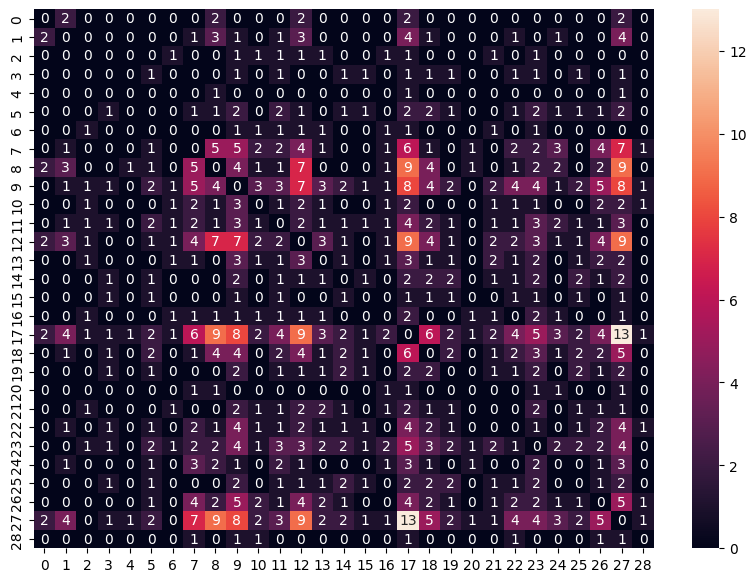

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming coocc is your DataFrame or array containing the data for the heatmap

# Set the size of the plot
plt.figure(figsize=(10, 7))  # Adjust the values (width, height) as needed

# Create the heatmap
sns.heatmap(coocc, annot=True, fmt="d")

# Display the heatmap
plt.show()


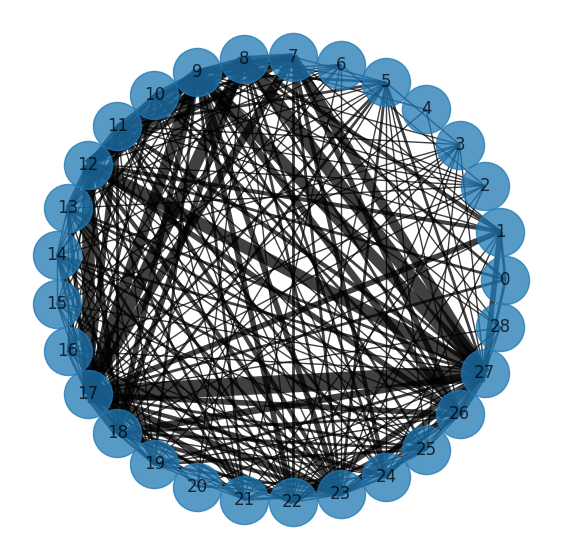

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have defined 'coocc' somewhere

A = np.matrix(coocc)
G = nx.from_numpy_array(A)
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Set the figure size
fig, ax = plt.subplots(figsize=(7, 7))

# Draw the graph with edge size given by the weight
nx.draw_circular(G, ax=ax, width=weights, alpha=0.75, with_labels=True, font_color='black', node_size=1200)

plt.show()

In [ ]:
y_pred = np.reshape(y_predictedvalues1, (17, 29))

print(y_pred.shape)  # Check the shape of the 2D array

(17, 29)


In [ ]:
df = pd.DataFrame(y_pred)
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,1,0
8,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,1,1,0,1,1,0


In [ ]:
#Ploat CoOccurence
df_asint = y_pred.astype(int)
coocc = df_asint.T.dot(df_asint)
coocc = pd.DataFrame(coocc)
np.fill_diagonal(coocc.values,0)
coocc
Predicted_y=coocc

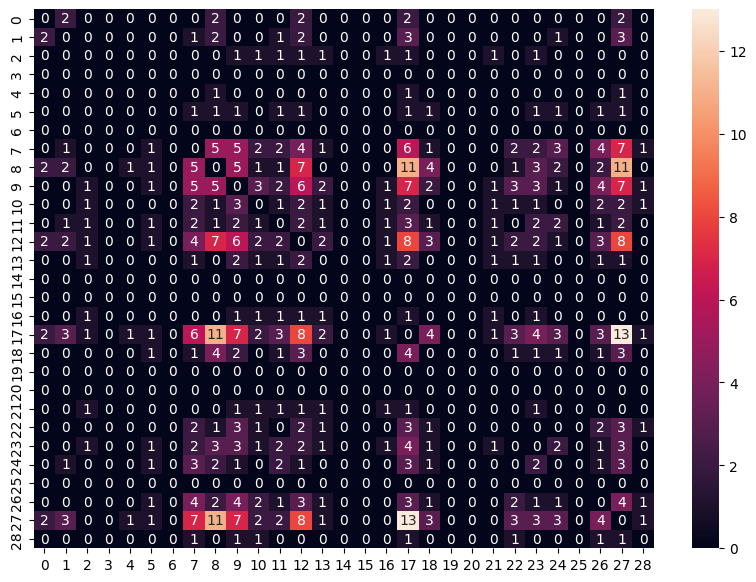

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the size of the plot
plt.figure(figsize=(10, 7))  # Adjust the values (width, height) as needed

# Create the heatmap
sns.heatmap(coocc, annot=True, fmt="d")

# Display the heatmap
plt.show()

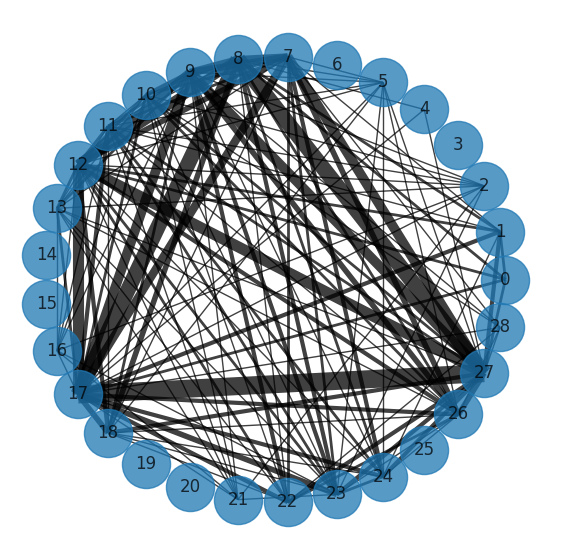

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have defined 'coocc' somewhere

A = np.matrix(coocc)
G = nx.from_numpy_array(A)
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Set the figure size
fig, ax = plt.subplots(figsize=(7, 7))

# Draw the graph with edge size given by the weight
nx.draw_circular(G, ax=ax, width=weights, alpha=0.75, with_labels=True, font_color='black', node_size=1200)

plt.show()


In [ ]:
import pandas as pd

def calculate_accuracy(df1, df2):
    if df1.shape != df2.shape:
        raise ValueError("DataFrames must have the same shape")

    total_entries = 0
    matching_entries = 0

    for i in range(df1.shape[0]):
        for j in range(df1.shape[1]):
            total_entries += 1
            if df1.iloc[i, j] == df2.iloc[i, j]:
                matching_entries += 1

    accuracy = matching_entries / total_entries
    return accuracy

# Example usage:
# Creating two sample DataFrames

df1 = Actual_y


df2 = Predicted_y

accuracy = calculate_accuracy(df1, df2)
print("Accuracy:", accuracy)


Accuracy: 0.6456599286563615
